In [53]:
import matplotlib.pyplot as plt
import numpy as np

G = 1 #6.674E-11
M1 = 0.75
M2 = 0.25

def RK4(h, t_ini, r_ini, v_ini, t_final):
    n = int((t_final - t_ini)/h)
    e0 = get_energy(r_ini, v_ini)
    r = r_ini
    v = v_ini
    del_r = 0
    del_v = 0
    coordx = list()
    coordy = list()
    r1x = list()
    r1y = list()
    r2x = list()
    r2y = list()
    err = list()
    print(n, "iterations")
    for i in range(0, n+1):
        #print(i, r, v)
        r1 = -M2*r/(M1+M2)
        r2 = M1*r/(M1+M2)      
        coordx.append(r[0])
        coordy.append(r[1])
        r1x.append(r1[0])
        r1y.append(r1[1])
        r2x.append(r2[0])
        r2y.append(r2[1])
        t = t_ini + i*h
        r += del_r
        v += del_v
        k1 = h*f(t,r)
        k2 = h*f(t+h/2, r+(h/2.0)*v+(h/8.0)*k1)
        k3 = h*f(t+h, r+h*v+(h/2.0)*k2)
        del_r = h*(v + (k1+2*k2)/6.0)
        del_v = (k1 +4*k2+k3)/6.0
        
        e = get_energy(r, v)
        rel_err = (e - e0)/e0
        err.append(rel_err)
        
    niter = np.linspace(0, n, n+1)
    fig = plt.figure()
    fig.set_size_inches(8, 6)
    ax = fig.add_subplot(211)
    plt.tight_layout()
    #ax.set_ylim(bottom=0.0)
    
    # FROM POV OF PARTICLE 1
    ax.plot(coordx, coordy, "y-")
    
    # FROM POV OF CENTER OF MASS
    ax.plot(r1x, r1y, "b-")
    ax.plot(r2x, r2y, "r-")
    
    ax.set_title('Initial orbit')
    ax.set_aspect('equal', adjustable='box')
#     ax.set_xlim([-0.75, 1.0])
#     ax.set_ylim([-1.0, 1.0])
    ax.set_xlabel('horizontal in arcsec')
    ax.set_ylabel('vertical in arcsec')
    ax.text(0.0, 0.0, 'o', color='green', fontsize=13)
#     ax.text(0.3, 0.5, '0.6', color='green', fontsize=13)
#     ax.add_artist(circ1)
#     ax.add_artist(circ2)
#     plt.show()
#     plt.plot(coordx, coordy)
#     plt.axis('equal')
    
    ax2 = fig.add_subplot(212)
    plt.tight_layout()
    ax2.plot(niter, err)
    ax2.set_xlabel('number of iterations')
    ax2.set_ylabel('relative error in energy')
    plt.show()
    return

def get_energy(r, v):
    e = 0.5*np.dot(v,v) - (G * (M1 + M2)/np.linalg.norm(r))
    return e

In [54]:
def f(t,r):
    y = -(G*(M1+M2)/np.power((np.linalg.norm(r)), 3))*r
    return y
    

First few orbit times
2.714080941082802
5.428161882165604
8.142242823248406
10.856323764331208
13.57040470541401
16.28448564649681
18.998566587579614
21.712647528662416
24.426728469745218
10000 iterations


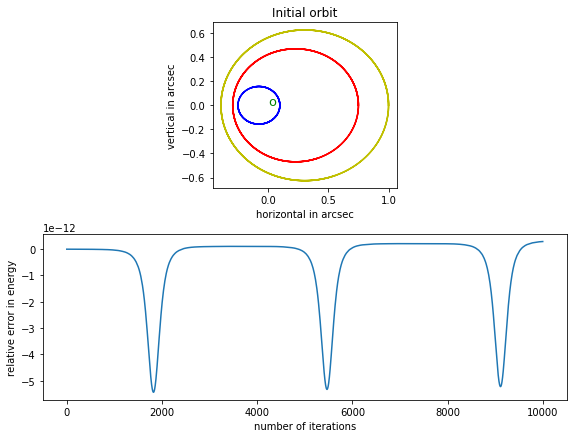

In [56]:
r_ini = np.array([1.0, 0.0, 0.0])
v_ini = np.array([0.0, 0.75, 0.0])
t_ini = 0
t_final = 10
h = 0.001
t_orbit = (4.0/7.0)**1.5 * 2.0 * np.pi

# Orbit time valid for M!+M2 = 1 onlu
# High accuracy will be achieved for position at final time = position at initial time. 
# i.e. integral number of orbits 
# t = 19 in this case
print("First few orbit times")
for i in range (1, 10):
    print(i*t_orbit)
#print(np.power(np.linalg.norm(r_ini), 3))
RK4(h, t_ini, r_ini, v_ini, t_final)